## Reinforcement Learning

The next and final topic in this course covers *Reinforcement Learning.* The technique is different than many of the other machine learning technique we have seen earlier and has many applications in training agents (an AI) to interact with environments like games. Rather than feeding our machine learning model millions of examples we let our model come up with its own examples by exploring an environment. The concept is simple. Humans learn by exploring and learning from mistakes and past experinces so let's have our computer do the same.

### Terminology

Before we dive into explaining reinforcement learning we need to define a few key peices of terminology.

**Environment** is reinforcement learning tasks we have a notion of the environment. This is what our agent will explore. An example of an environment in the case of training an AI to play say a game of mario would be the level we are training the agent on.

**Agent** an agent is an entity that is exploring the environment. Our agent will interact and take different actions within the environment. In our mario example the mario character within the game would be our agent.

**State** always our agent will be in what we call a *state.* The state simply tells us aabout the status of the agent. The most common example of a state is the location of the agent within the environment. Moving locations would change the agents state.

**Action** any interaction between the agent and environment would be considered an action. For example, moving to the left or jumping would be an action. An action may or may not change the current *state* of the agent. In fact, the act of doing nothing is an action as well! The action of say not pressing a key if we are using our mario example.

**Reward** every action that our agent takes will result in a reward of some magnitude (positive or negative). The goal of our agent will be to maximize its reward in an environment. Sometimes the reward will be clear, for example if an agent performs an action which increases their score in the environment we would say they've received a positive reward. If the agent were to perform an action which results in them losing score or possibly dying in the environment then they would receive a negative reward.

The most important part of reinforcement learning is determining how to reward the agent. After all, the goal of the agent is to maximize its rewards. This means we should reward the agent appropriately such that it reaches the desired goal.

### Q-learning

Now that we have a vague idea of how reinforcement learning works, it's time to talk about a specific technique in reinforcemnet learning called *Q-learning.*

Q-learning is a simple yet quite powerful technique in machine learning that involves learning a matrix of action-reward values. This matrix is often reffered to as a Q-Table or Q-Matrix. The matrix is in shape (number of possible states, number of possible actions) where each value at matrix[n,m] represnts the agents expected reward given they are un state n and take action m. The Q-learning algorithm defines the way we update the values in the matrix and decide what action to take each state. The idea is that after a successful training/learning of this Q-Table/matrix, we can determine the action an agent should take in any state by looking at that states row in the matrix and taking the maximum value column as the action.

**Consider this example.**

Let's say A1-A4 are the possible actions and we have 3 states represented by each row (state 1 - state 3).

| A1  | A2  | A3  | A4  |
|:--: |:--: |:--: |:--: |
|  0  |  0  | 10  |  5  |
|  5  | 10  |  0  |  0  |
| 10  |  5  |  0  |  0  |

If that was our Q-Table/matrix then the following would be the preferred actions in each state.

> State 1: A3

> State 2: A2

> State 3: A1

We can see that this is because the values in each of those columns are the highest for those states!

### Learning the Q-Table

So that's simple, right? Now how do we create this table and find those values. Well this is where we will discuss how the Q-learning algorithm updates the values in our Q-Table.

I'll start by noting that our Q-Table starts of all 0 values. This is because the agent has yet learn anything about the environment.

Our agent learns by exploring the environment and observing the outcome/reward from each action it takes in each state. But how does it know what action to take in each state? There are two ways that our agent can decide on which action to be.

1. Randomly picking a valid action
2. Using the current Q-Table to find the best action

Near the beginning of our agents learning, it will mostly take random actions in order to explore the environment and enter many different states. As it starts to explore more of the environment, it will start to gradually rely more on it's learned values (Q-Table) to take actions. This means that as our agent explores more of the environment, it will develop a better understandinng and start to take "correct" or better actions more often. It's important that the agent has a good balance of taking random actions and using learned values to ensure it does get trapped in a local maximum.

After each new action, our agent will reccord the new state (if any) that it has entered and the reward that it received from taking that action. These values will be used to update the Q-Table. The agent will stop taking new actions only once a certain time limit is reached or it has achieved the goal or reached the end of the environment.

#### a. Updating Q-Values

The formula for updating the Q-table after each action is as follows:

> $ Q[state, action] = Q[state, action] + \alpha * (reward + \gamma * max(Q[newState, :]) - Q[state, action]) $

- $\alpha$ stands for the **Learning Rate**

- $\gamma$ stands for the **Discount Factor**

#### b. Learning Rate $\alpha$

The learning rate $\alpha$ is a numeric constant that defines how much change is permitted on each Q-Table update. A high learning rate means that each update will introduce a large change to the current state-action value. A small learning rate means that each update has a more subtle change. Modifying the learning rate will change how the agent explores the environment and how quickly it determines the final values in the Q-Table.

#### c. Discount Factor $\gamma$

Discount factor also known as gamma ($\gamma$) is used to balance how much focus is put onthe current and future reward. A high discount factor means that future rewards will be considered more heavily.

To perform updates on this table, we will let the agent explore the environment for a certain period of time and use each of its actions to make an update. Slowly we should start to notice the agent learning and choosing better actions.

## 1. Q-Learning Example

For this example we will use the Q-Learning algorithm to train an agent to navigate a popular environment from the [Open AI Gym](https://gym.openai.com/). The Open AI Gym was developed so programmers could practice machine learning using unique environments.

Let's start by looking at what Open AI Gym

In [26]:
# all you have to do to import and use open ai gym!
import gym

Once you import gym you can load an environment using the line gym.make("environment")

In [27]:
# we are going to use the FrozenLake environment
env = gym.make("FrozenLake-v1")

There are a few other commands that can be used to interact and get information about the environment.

In [28]:
print(env.observation_space.n) # get number of states
print(env.action_space.n) # get number of actions

16
4


In [29]:
# reset environment to default state
env.reset()

0

In [30]:
# get a random action
action = env.action_space.sample()

In [31]:
# take action, notice it return
new_state, reward, done, info = env.step(action)

In [32]:
# render the GUI for the environment
env.render()

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


### 1.1 Frozen Lake Environment

Now that we have a basic understanding of how the gym environment works, it's time to discuss the specific problem we will be solving.

The environment we loaded above `FrozenLake-v1` is one of the simplest environments in Open AI Gym. The goal of the agent is to navigate to a frozen lake and find the Goal without falling through the ice (render the
 environment above to see an example).

 There are:

 - 16 states (one for each square)
 - 4 possible actions (LEFT, RIGHT, DOWN, UP)
 - 4 different types of blocks (F: Frozen, H: Hole, S:Start, G:Goal)

### 1.2 Building the Q-Table

The first thing we need to do is build an empty Q-Table that we can use to store and update our values.

In [9]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [12]:
# Create a matrix with all 0 values
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### 1.3 Constants

As we discussed, we need to define some constants that wil be used to update our Q-Table and tell our agent when to stop training.

In [13]:
# how many times to run the environment from the beginning
EPISODES = 2000
# max number of steps allowed for each run of environment
MAX_STEPS = 100

# learning rate
LEARNING_RATE = 0.81
GAMMA = 0.96

### 1.4 Picking an Action

Remember that we can pick an action using one of two methods:
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action

Here we will define a new value $\epsilon$ that will tell us the propability of selecting a random action. This value will start off very high and slowly decrease as the agent learns more about the environment.

In [14]:
# start with a 90% chance of picking a random action
epsilon = 0.9

# code to pick action
# we will check if a randomly selected value is less than epsilon
if np.random.uniform(0, 1) < epsilon:
  # take random action
  action = env.action_space.sample()
else:
  # use Q table to pick best action based on current values
  action = np.argmax(Q[state, :])

### 1.5 Updating Q Values

The code below implements the formula discussed above.

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

### 1.6 Putting it Together

Now that we know how to do some basic things we can combine these together to create our Q-Learning algorithm.

In [41]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [42]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[2.15385679e-01 8.20450093e-03 8.93348213e-03 9.03440291e-03]
 [1.68315764e-03 2.85476662e-03 4.47656843e-03 1.73022166e-01]
 [3.81090147e-03 2.46213362e-03 2.22090296e-03 3.10006927e-01]
 [3.94382185e-03 1.21110487e-03 1.00798898e-03 1.36870611e-01]
 [2.16608868e-01 3.80351270e-03 9.23431444e-04 6.64397731e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.71904303e-04 1.18055229e-04 3.20025079e-01 1.28488200e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.77809404e-03 3.83022081e-03 2.17672708e-03 3.36980561e-01]
 [4.81997245e-03 6.08470215e-01 2.28479496e-03 1.98479446e-03]
 [7.09132586e-01 1.07193163e-03 3.33611687e-04 7.76925930e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.30983233e-01 1.39380467e-01 7.93322984e-01 2.42869547e-02]
 [2.34246467e-01 6.73776823e-01 1.23075124e-01 2.22720121e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

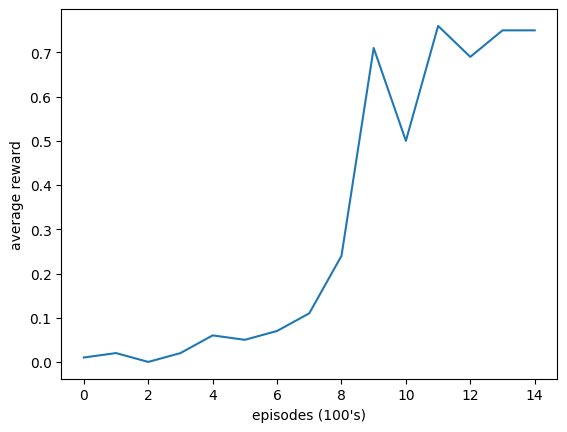

In [43]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()